In [1]:
#IMPORTS
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA as PCA
from sklearn.metrics import confusion_matrix as confusion_matrix
from sklearn.metrics import classification_report as classification_report

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn import cross_validation
forest_reg = RandomForestRegressor()
from sklearn.ensemble import RandomForestClassifier 
forest_class = RandomForestClassifier()


from sklearn.metrics import mean_squared_error

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls '/content/drive/Team Drives/Machine Learning/data'

data.csv      sample.csv		    yelp_checkin.csv
data_old.csv  yelp_business_attributes.csv  yelp_review.csv
ML_Test.csv   yelp_business.csv		    yelp_tip.csv
ML_Train.csv  yelp_business_hours.csv	    yelp_user.csv


In [0]:
#Read in data
data = pd.read_csv('/content/drive/Team Drives/Machine Learning/data/data.csv')

In [5]:
cat_vars=['Dominant_Topic','review_year','yelping_since_year','review_month']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

#Combine the dummified variabls into the original data
cat_vars=['Dominant_Topic','review_year','yelping_since_year','review_month']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=data[to_keep]
data_final.columns.values
data.shape

(29992, 329)

In [0]:
X = data.drop(['Unnamed: 0','useful_review','mon_hours','tue_hours','wed_hours',
               'thu_hours','fri_hours','sat_hours','sun_hours','yelping_since',
               'city','state','postal_code','review_date','yelping_since_year',
               'Dominant_Topic','review_month','review_month'], axis=1)

y = data['useful_review']
y = np.asarray(y).reshape((len(y),1))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [0]:
X_train_num = X_train.iloc[:,0:34].drop(['is_open'],axis =1)
X_test_num = X_test.iloc[:,0:34].drop(['is_open'],axis =1)

In [0]:
#Separate categorical variables and convert to numpy array
X_vars = X_train_num.columns.values.tolist()
X_cols = X_train.columns.values.tolist()
X_cat = [i for i in X_cols if i not in X_vars]
X_train_cat = X_train[X_cat].values
X_test_cat = X_test[X_cat].values

In [0]:
#Scale numerical variables
sc_X = StandardScaler()
X_train_num = sc_X.fit_transform(X_train_num)
X_test_num = sc_X.transform(X_test_num)


In [0]:
#Concatenate numerical and categorical variables together

X_train_comb = np.concatenate([X_train_num, X_train_cat], axis=1)
X_test_comb = np.concatenate([X_test_num, X_test_cat], axis=1)

In [0]:
#Base Random Forest Model
Forest_Model1=forest_class.fit(X_train_comb, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [0]:
y_pred1 = Forest_Model1.predict(X_test_comb)

In [0]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
confusion_matrix(y_test, y_pred1, labels=None, sample_weight=None)

array([[8233,   41],
       [ 473,  251]])

In [0]:
#testing for overfitting
y_pred_train1 = Forest_Model1.predict(X_train_comb)

In [0]:
print(classification_report(y_test, y_pred1))
print(classification_report(y_train, y_pred_train1))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      8274
          1       0.86      0.35      0.49       724

avg / total       0.94      0.94      0.93      8998

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19388
          1       1.00      0.91      0.95      1606

avg / total       0.99      0.99      0.99     20994



Model 1 is overfitting. 

In [0]:
#grid search
param_grid = {'max_depth':[2, 4, 6, 8],
'min_samples_split':[3,4,5,6,7,8],
'random_state':[42]}

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [0]:
# create Random Forest model 
rf_obj=RandomForestClassifier()
rf_reg=RandomForestRegressor()

In [0]:
# Create gridsearch object with various combinations of parameters
rf_Grid = GridSearchCV(rf_obj, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)
rf_Grid_reg = GridSearchCV(rf_reg, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

In [0]:
rf_Grid.fit(X_train_comb, y_train)


In [0]:
rf_Grid_reg.fit(X_train_comb, y_train)

In [17]:
rf_Grid.best_params_

{'max_depth': 8, 'min_samples_split': 5, 'random_state': 42}

In [18]:
best_estimator=rf_Grid.best_estimator_
best_estimator

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
best_estimator_reg=rf_Grid_reg.best_estimator_

In [19]:
y_pred_grid2=best_estimator.predict(X_test_comb)
y_pred_grid2

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
y_pred_reg_grid2=best_estimator_reg.predict(X_test_comb)
y_pred_reg_grid2

array([0.00585972, 0.06434042, 0.14112544, ..., 0.21352016, 0.12208446,
       0.01629292])

In [20]:
confusion_matrix(y_test, y_pred_grid2, labels=None, sample_weight=None)

array([[8225,   49],
       [ 471,  253]])

In [0]:
#testing for overfitting
y_pred_train2 = best_estimator.predict(X_train_comb)

In [22]:
print(classification_report(y_test, y_pred_grid2))
print(classification_report(y_train, y_pred_train2))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8274
          1       0.84      0.35      0.49       724

avg / total       0.94      0.94      0.93      8998

             precision    recall  f1-score   support

          0       0.95      1.00      0.97     19388
          1       0.93      0.40      0.56      1606

avg / total       0.95      0.95      0.94     20994



In [0]:
#Regression, not classification



In [0]:
#Less overfitting than model 1, but still overfitting slightly. 

In [0]:
clf3 = RandomForestClassifier(max_depth=6, random_state=42)

In [0]:
Forest_Model3=clf3.fit(X_train_comb, y_train)

In [0]:
y_pred3 = Forest_Model3.predict(X_test_comb)

In [0]:
confusion_matrix(y_test, y_pred3, labels=None, sample_weight=None)

In [0]:
#testing for overfitting
y_pred_train3 = Forest_Model3.predict(X_train_comb)

In [0]:
print(classification_report(y_test, y_pred3))
print(classification_report(y_train, y_pred_train3))

In [0]:
from sklearn.metrics import roc_auc_score

In [34]:

print(roc_auc_score(y_test, y_pred_reg_grid2))


0.9199354931977559


In [0]:
#With max_depth=6, the tree still overfits slightly, although the recall & f1 score for test data have gone down significantly. 
#Best model was chose through grid search with {'max_depth': 8, 'min_samples_split': 5, 'random_state': 42} 

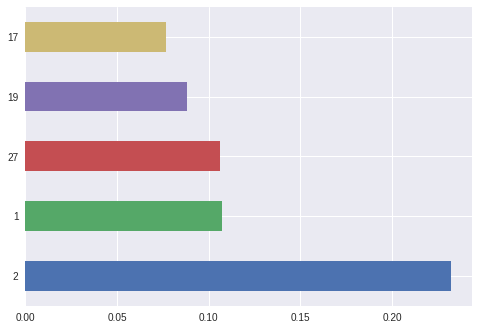

In [0]:
feat_importances = pd.Series(best_estimator.feature_importances_)
feat_importances.nlargest(5).plot(kind='barh')


In [0]:
X_train 